# 实例10.5-GradientTape自动求导实例

In [538]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [539]:
x=tf.Variable(3.)

with tf.GradientTape(persistent=True) as tape:
    y=tf.square(x)
    z=pow(x,3)
dy_dx=tape.gradient(y,x)
dz_dx=tape.gradient(z,x)

print(y)
print(dy_dx)
print(z)
print(dz_dx)

del tape

tf.Tensor(9.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)
tf.Tensor(27.0, shape=(), dtype=float32)
tf.Tensor(27.0, shape=(), dtype=float32)


In [540]:
x=tf.Variable(3.)
y=tf.Variable(4.)

with tf.GradientTape(persistent=True) as tape:
    f=tf.square(x)+2*tf.square(y)+1
df_dx,df_dy=tape.gradient(f,[x,y])

print(f)
print(df_dx)
print(df_dy)

fitst_grads=tape.gradient(f,[x,y])
print(fitst_grads)

del tape

tf.Tensor(42.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)
tf.Tensor(16.0, shape=(), dtype=float32)
[<tf.Tensor: shape=(), dtype=float32, numpy=6.0>, <tf.Tensor: shape=(), dtype=float32, numpy=16.0>]


In [541]:
x=tf.Variable([1.,2.,3.,])
y=tf.Variable([4.,5.,6.])

with tf.GradientTape() as tape:
    f=tf.square(x)+2*tf.square(y)+1
df_dx,df_dy=tape.gradient(f,[x,y])

print(f)
print(df_dx)
print(df_dy)

tf.Tensor([34. 55. 82.], shape=(3,), dtype=float32)
tf.Tensor([2. 4. 6.], shape=(3,), dtype=float32)
tf.Tensor([16. 20. 24.], shape=(3,), dtype=float32)


In [542]:
x=tf.Variable([137.97,104.50,100.00,124.32,79.20,99.00,124.00,114.00,
               106.69,138.05,53.75,46.91,68.00,63.02,81.26,86.21],
              dtype=tf.float32)
y=tf.Variable([145.00,110.00,93.00,116.00,65.32,104.00,118.00,91.00,
               62.00,133.00,51.00,45.00,78.50,69.65,75.69,95.30],
              dtype=tf.float32)

learn_rate=0.0001
iter=10

display_step=1

np.random.seed(612)
w = tf.Variable(np.random.randn(), dtype=tf.float32)
b = tf.Variable(np.random.randn(), dtype=tf.float32)


In [543]:
mse=[]

for i in range(0,iter+1):
    with tf.GradientTape() as tape:
        pred=w*x+b
        # pred=tf.matmul(x,tf.reshape(w,[-1,1]))
        Loss=0.5*tf.reduce_mean(tf.square(y-pred))
    mse.append(Loss)
    
    dL_dw,dL_db=tape.gradient(Loss,[w,b])
    w.assign_sub(learn_rate*dL_dw)
    b.assign_sub(learn_rate*dL_db)
    if i%display_step==0:
        print("i:%i,Loss:%f,w:%f,b:%f"%(i,mse[i].numpy(),w.numpy(),b.numpy()))

i:0,Loss:4749.362305,w:0.946047,b:-1.153577
i:1,Loss:89.861862,w:0.957843,b:-1.153412
i:2,Loss:89.157501,w:0.957987,b:-1.153359
i:3,Loss:89.157379,w:0.957988,b:-1.153308
i:4,Loss:89.157364,w:0.957988,b:-1.153257
i:5,Loss:89.157318,w:0.957987,b:-1.153206
i:6,Loss:89.157280,w:0.957987,b:-1.153155
i:7,Loss:89.157265,w:0.957986,b:-1.153104
i:8,Loss:89.157219,w:0.957986,b:-1.153052
i:9,Loss:89.157211,w:0.957985,b:-1.153001
i:10,Loss:89.157196,w:0.957985,b:-1.152950


Text(0, 0.5, 'Loss')

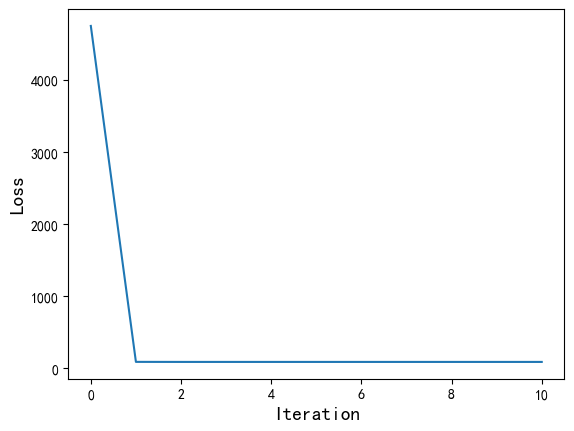

In [544]:
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.plot(range(0,iter+1),mse)
plt.xlabel("Iteration",fontsize=14)
plt.ylabel("Loss",fontsize=14)

In [545]:
x1=np.array([137.97,104.50,100.00,124.32,79.20,99.00,124.00,114.00,
               106.69,138.05,53.75,46.91,68.00,63.02,81.26,86.21])
x2=np.array([3,2,2,3,1,2,3,2,2,3,1,1,1,1,2,2])
y=np.array([145.00,110.00,93.00,116.00,65.32,104.00,118.00,91.00,
               62.00,133.00,51.00,45.00,78.50,69.65,75.69,95.30])
x0=np.ones(len(x1))
X=tf.Variable(np.stack((x0,x1,x2),axis=1))
Y=tf.Variable(np.array(y).reshape(-1,1))

np.random.seed(612)
W=tf.Variable(np.random.randn(3,1))

learn_rate=0.00001
iter=500
display_step=50

In [546]:
mse=[]
for i in range(0,iter+1):
    with tf.GradientTape() as tape:
        PRED=tf.matmul(X,W)
        Loss=0.5*tf.reduce_mean(tf.square(Y-PRED))
    mse.append(Loss)
    
    dL_dW=tape.gradient(Loss,W)
    W.assign_sub(learn_rate*dL_dW)
    if i%display_step==0:
        print("i: %i, Loss: %f" %(i,Loss))

i: 0, Loss: 22167.906249
i: 50, Loss: 89.444088
i: 100, Loss: 88.774540
i: 150, Loss: 88.774042
i: 200, Loss: 88.773564
i: 250, Loss: 88.773087
i: 300, Loss: 88.772609
i: 350, Loss: 88.772131
i: 400, Loss: 88.771654
i: 450, Loss: 88.771176
i: 500, Loss: 88.770699


Text(0, 0.5, 'Loss')

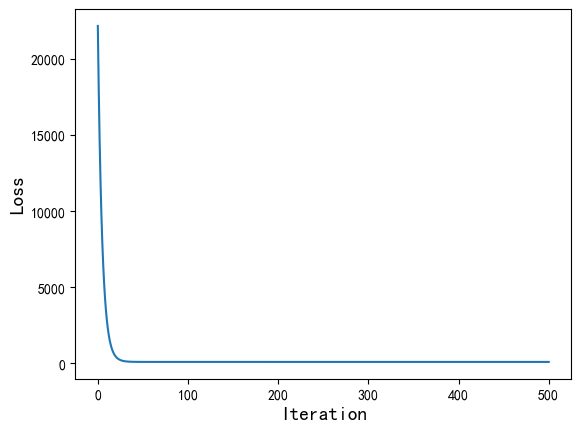

In [547]:
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.plot(range(0,iter+1),mse)
plt.xlabel("Iteration",fontsize=14)
plt.ylabel("Loss",fontsize=14)